In [58]:
pip install scipy

  Using cached scipy-1.15.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.15.3-cp313-cp313-win_amd64.whl (41.0 MB)


In [52]:
import numpy as np
import pandas as pd
import seaborn as sns

In [29]:
df = pd.read_csv("Yulu.csv");

In [30]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [32]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [33]:
df.season.value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [34]:
df.weather.value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [35]:
df.workingday.value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

<Axes: xlabel='workingday', ylabel='count'>

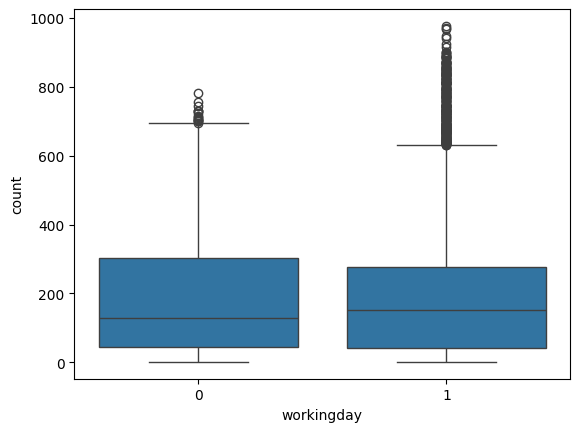

In [36]:
sns.boxplot(x='workingday',y='count', data=df)

<Axes: xlabel='weather', ylabel='count'>

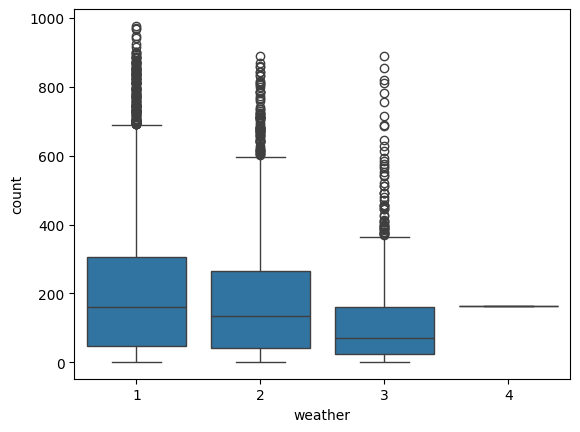

In [37]:
sns.boxplot(x='weather',y='count', data=df)

<Axes: xlabel='season', ylabel='count'>

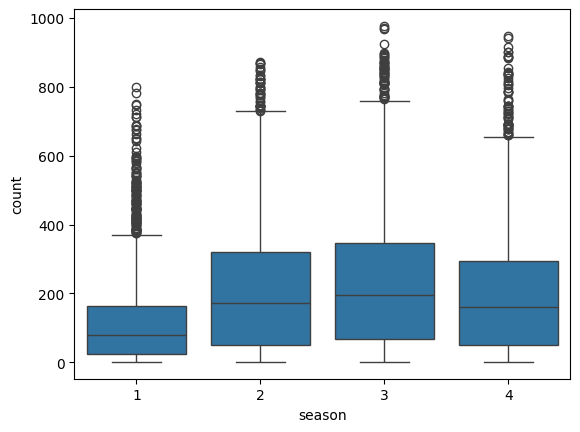

In [38]:
sns.boxplot(x='season',y='count', data=df)

<Axes: xlabel='holiday', ylabel='count'>

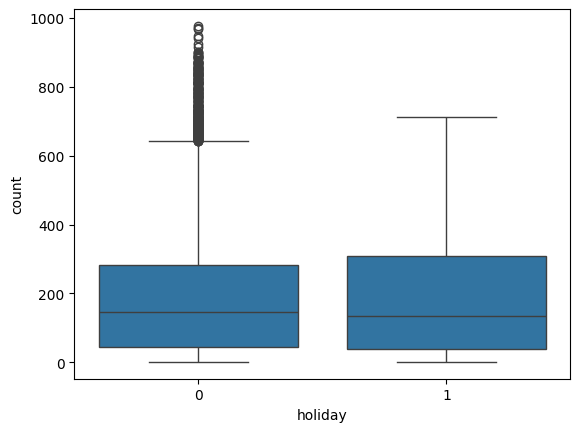

In [40]:
sns.boxplot(x='holiday',y='count', data=df)

In [46]:
df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [ ]:
#ho= the count of bikes on working_day <= the count on non-working

In [67]:
#ha= the count of bikes on working_day > the count on non-working
alpha = 0.05
#t-test

In [47]:
working_day= df[df['workingday']==1]['count'].sample(3400)
non_working_day= df[df['workingday']==0]['count'].sample(3400)

In [48]:
working_day.std()

np.float64(182.29094964838796)

In [49]:
non_working_day.std()

np.float64(173.78040150896794)

In [60]:
from scipy.stats import ttest_ind

In [63]:
test_stats, p_val=ttest_ind(working_day,non_working_day, equal_var= False ,alternative='greater')

In [64]:
p_val

np.float64(0.19681900570603889)

In [68]:
p_val> alpha

np.True_

In [69]:
#insights

In [70]:
df.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [ ]:
#ho= the count of bikes subscribed are similar across different weather
#ha= the count of bikes subscribed are not similar across different weather
#anova
#assumptions
#a. The distribution should be normal -- qqplot, distplot, Shapiro Wilk test - ho= Dist is
#b. equal variances - describe, levene's test- ho= equal varaince


In [71]:
w1= df[df['weather']==1]['count'].sample(850)
w2= df[df['weather']==2]['count'].sample(850)
w3= df[df['weather']==3]['count'].sample(850)


C:\Users\Vishal\AppData\Local\Temp\ipykernel_5484\727255023.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(w1)


<Axes: xlabel='count', ylabel='Density'>

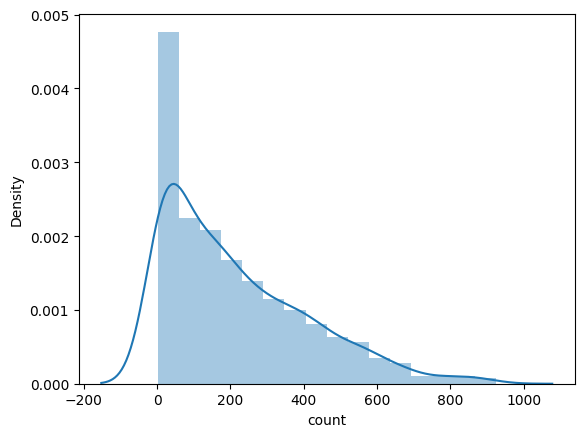

In [73]:
#normality
sns.distplot(w1)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_5484\262749121.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(w2)


<Axes: xlabel='count', ylabel='Density'>

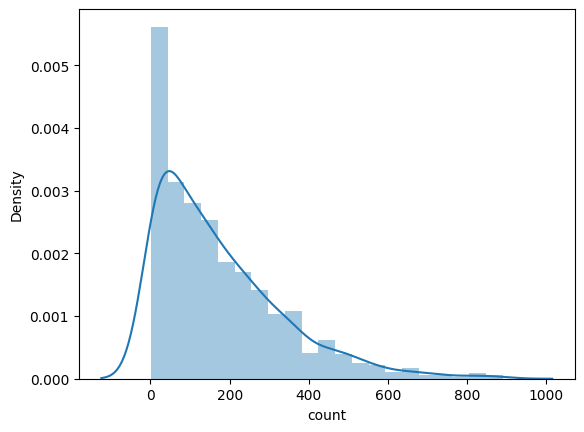

In [74]:
#normality
sns.distplot(w2)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_5484\1612253951.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(w3)


<Axes: xlabel='count', ylabel='Density'>

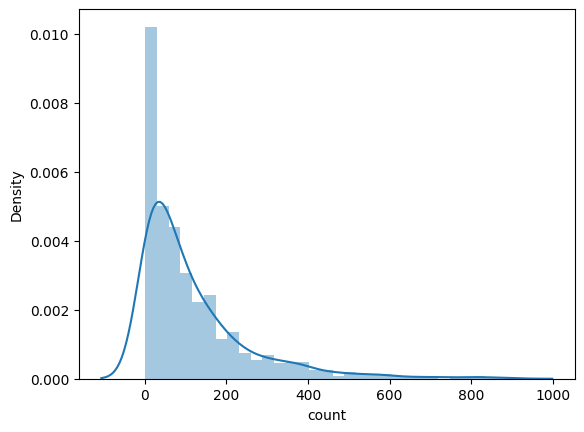

In [75]:
sns.distplot(w3)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_5484\3529599385.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(w1))


<Axes: xlabel='count', ylabel='Density'>

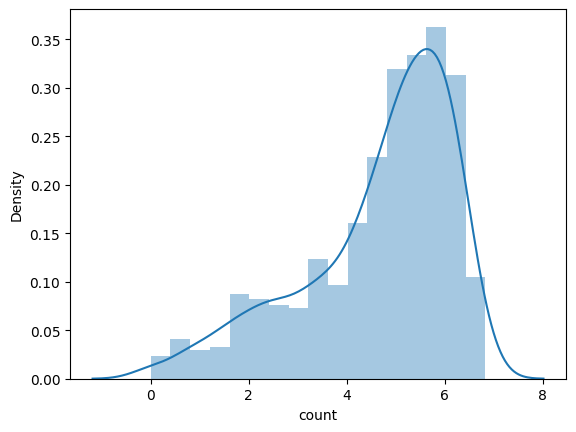

In [77]:
#to fix right bias or skewness- Log transformation
import numpy as np
sns.distplot(np.log(w1))


C:\Users\Vishal\AppData\Local\Temp\ipykernel_5484\941925657.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(w2))


<Axes: xlabel='count', ylabel='Density'>

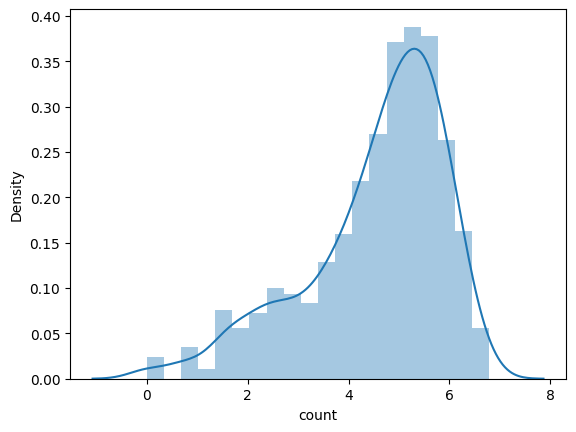

In [78]:
sns.distplot(np.log(w2))

C:\Users\Vishal\AppData\Local\Temp\ipykernel_5484\3371023734.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(w3))


<Axes: xlabel='count', ylabel='Density'>

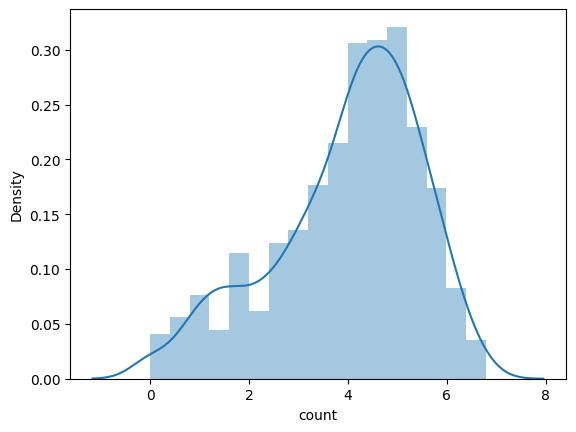

In [79]:
sns.distplot(np.log(w3))

In [80]:
#the distributions are not normal through visual analysis

In [82]:
#shapiro ho= Dist is normal
from scipy.stats import shapiro


In [83]:
t_stats, p_val = shapiro(w1)


In [84]:
p_val > alpha

np.False_

In [85]:
from scipy.stats import levene


In [86]:
t_stats, p_val = levene(w1, w2, w3)

In [87]:
p_val > alpha


np.False_

In [ ]:
#variance is also different
#should we apply anova - No
#KW test -- https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-chea
#https://stats.stackexchange.com/questions/5680/can-i-trust-anova-results-for-a-non-normall

In [88]:
from scipy.stats import f_oneway
t_stats, p_val = f_oneway(w1, w2, w3)

In [89]:
p_val > alpha

np.False_

In [ ]:
#weather has an affect on subscriptions of bikes

In [90]:
#does season has an affect on the bike subscription?
same test, same assumptions , same process
#does weather has an effect on season
#chi-square

SyntaxError: invalid syntax (1656559694.py, line 2)